In [14]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [15]:
path = 'path where you download your dataset'

First of all we need to create the function to unpickle the data from the filepath(parameter 'file') and return the information of data as dictionary(dict)

In [19]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

Now, from the file, we need to read the single file and separate the data and labels associated to its data.

In [20]:
def loadBatch(filePath):
    dataDict = unpickle(filePath)
    return dataDict[b'data'], dataDict[b'labels']

After the data and labels are separated, we need to define the Train Data(xTrain), Train Label(yTrain), Test Data(xTest) and Test label(yTest).

In [21]:
def loadData(listOfTrainFilePath, testFilePath):
    xTrain = []
    yTrain = []
    for i in range(len(listOfTrainFilePath)):
        data, labels = loadBatch(listOfTrainFilePath[i])
        xTrain = data if i == 0 else np.concatenate([xTrain, data], axis=0)
        yTrain = labels if i == 0 else np.concatenate([yTrain, labels], axis=0)
    xTest, yTest = loadBatch(testFilePath)
    yTest = np.array(yTest)
    yTrain = np.array(yTrain)
    return xTrain, yTrain, xTest, yTest

As CIFAR-10 dataset consists of 32x32 color images, we need to convert the training and testing samples into 3-D matrix.

In [5]:
def vectorToRGBMatrix(xTrain, xTest):
    xTrain = np.dstack((xTrain[:, :1024], xTrain[:, 1024:2048], xTrain[:, 2048:])) / 255.
    xTrain = np.reshape(xTrain, [-1, 32, 32, 3])
    xTest = np.dstack((xTest[:, :1024], xTest[:, 1024:2048], xTest[:, 2048:])) / 255.
    xTest = np.reshape(xTest, [-1, 32, 32, 3])
    return xTrain, xTest

To visualize the 3D matrix in image form, the following function is used. This function display the number of different images form every class into a single plot. Parameters data, labels, row, col and scale define the Training Data, Training labels or classes, number of row of images to be displayed, number of columns of images to be displayed, size of image respectively.
One can change the parameter data to test data too to display the test images.

In [10]:
def displayCifarImages(data, labels, meta, row, col, scale):
    idx = count = 0
    imgWidth = imgHeight = 32
    keys = [lb for lb in range(len(meta))]
    labelCount = dict.fromkeys(keys, 0)
    figWidth = imgWidth / 80 * row * scale
    figHeight = imgHeight / 80 * col * scale
    fig, axes = plt.subplots(row, col, figsize=(figHeight, figWidth))
    while count < row * col:
        if labelCount[labels[idx]] >= row:
            idx += 1
            continue

        r = labelCount[labels[idx]]
        c = labels[idx]
        axes[r][c].imshow(data[idx])
        axes[r][c].set_title('{}: {}'.format(labels[idx],
                                             meta[labels[idx]].decode("utf-8")))
        axes[r][c].axis('off')
        plt.tight_layout()
        labelCount[labels[idx]] += 1
        count += 1
        idx += 1
    # plt.savefig(filepath)
    plt.show()

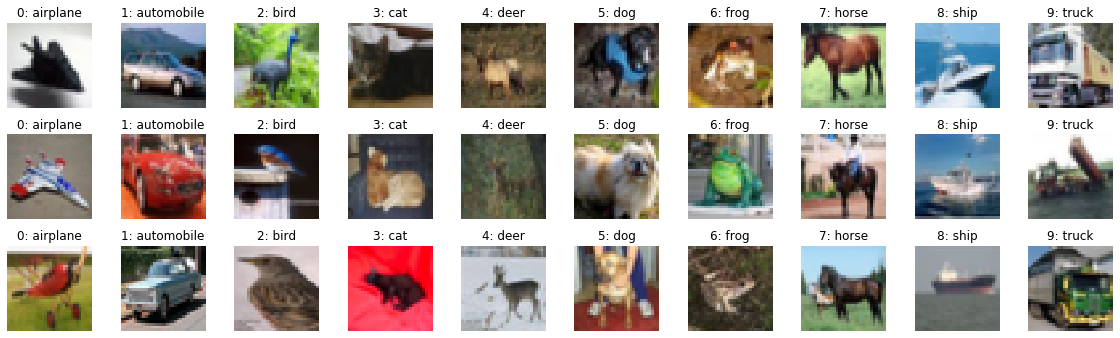

In [12]:
TRAIN_FILENAMES = [os.path.join(path, 'data_batch_' + str(i)) for i in range(1, 6)]
TEST_FILENAME = os.path.join(path, 'test_batch') # complete path of testing file
META_FILENAME = os.path.join(path, 'batches.meta') # complete path of meta file
meta = unpickle(META_FILENAME)
meta = meta[b'label_names']
xTrain, yTrain, xTest, yTest = loadData(TRAIN_FILENAMES, TEST_FILENAME)
xTrainMtrxRGB, xTestMtrxRGB = vectorToRGBMatrix(xTrain, xTest)
displayCifarImages(xTrainMtrxRGB, yTrain, meta, row=3, col=10, scale=4.)